# XP Exercises - Inferential statistics with regression

As stated in the instructions, please complete the code when you see a "##TODO"


In [7]:
import pandas as pd
import numpy as np
from scipy import stats
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from scipy.stats import ttest_1samp


In [8]:
## TODO : load the dataset in a dataframe called d1, that you can find here : https://www.kaggle.com/code/youssefelzahar/inferential-statistics/input?select=air+traffic.csv
d1 = pd.read_csv('air traffic.csv')
print(d1.head())

   Year  Month     Dom_Pax    Int_Pax         Pax  Dom_Flt Int_Flt      Flt  \
0  2003      1  43,032,450  4,905,830  47,938,280  785,160  57,667  842,827   
1  2003      2  41,166,780  4,245,366  45,412,146  690,351  51,259  741,610   
2  2003      3  49,992,700  5,008,613  55,001,313  797,194  58,926  856,120   
3  2003      4  47,033,260  4,345,444  51,378,704  766,260  55,005  821,265   
4  2003      5  49,152,352  4,610,834  53,763,186  789,397  55,265  844,662   

      Dom_RPM     Int_RPM         RPM     Dom_ASM     Int_ASM         ASM  \
0  36,211,422  12,885,980  49,097,402  56,191,300  17,968,572  74,159,872   
1  34,148,439  10,715,468  44,863,907  50,088,434  15,587,880  65,676,314   
2  41,774,564  12,567,068  54,341,633  57,592,901  17,753,174  75,346,075   
3  39,465,980  10,370,592  49,836,572  54,639,679  15,528,761  70,168,440   
4  41,001,934  11,575,026  52,576,960  55,349,897  15,629,821  70,979,718   

   Dom_LF  Int_LF     LF  
0   64.44   71.71  66.20  
1   68.1

# Columns Description

* Dom_Pax : Domestic Air Travel Passengers
* Int_Pax : International Air Travel Passengers
* Pax : Total Air Travel Passengers
* Dom_Flt : Number of Flights (Domestic)
* Int_Flt : Number of Flights (International)
* Flt : Number of Flights (Total)
* Dom_RPM : Revenue Passenger-miles (Domestic)
* Int_RPM : Revenue Passenger-miles (International)


In [12]:
## TODO: Check the summary of the DataFrame to see its structure and data types.
print(d1.info())

#Transform all objects to flot
for col in d1.select_dtypes(include='object').columns:
    d1[col] = d1[col].str.replace(',', '', regex=False).astype(float)

print(d1.head())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 249 entries, 0 to 248
Data columns (total 17 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Year     249 non-null    int64  
 1   Month    249 non-null    int64  
 2   Dom_Pax  249 non-null    object 
 3   Int_Pax  249 non-null    object 
 4   Pax      249 non-null    object 
 5   Dom_Flt  249 non-null    object 
 6   Int_Flt  249 non-null    object 
 7   Flt      249 non-null    object 
 8   Dom_RPM  249 non-null    object 
 9   Int_RPM  249 non-null    object 
 10  RPM      249 non-null    object 
 11  Dom_ASM  249 non-null    object 
 12  Int_ASM  249 non-null    object 
 13  ASM      249 non-null    object 
 14  Dom_LF   249 non-null    float64
 15  Int_LF   249 non-null    float64
 16  LF       249 non-null    float64
dtypes: float64(3), int64(2), object(12)
memory usage: 33.2+ KB
None
   Year  Month     Dom_Pax    Int_Pax         Pax   Dom_Flt  Int_Flt  \
0  2003      1  43032450.0  4905

# Inferential statistics

We will perform the following :

1. Linear Regression

2. Hypothesis testing




# Linear and Multiple Regression

The best linear line describe the correlation between two variables.

We have two types:

1. linear Regression
2. Multiple Regression

The equation of regression

**w=a+(b*x)**

**w=predict variable**(The point of intersection of the x axis and the y axis)

**a=intercept**(The point of intersection of the regression and the y axis)

**b=slope**(The amount of increase in regression relative to the x-axis)

# Linear Regression

In [13]:
## TODO: Explore the relationship between domestic passengers and domestic flights.
x=d1["Dom_Pax"]
y=d1["Dom_Flt"]

In [14]:
## TODO: Perform a linear regression between domestic passengers and domestic flights, and create a prediction model.
slope,intercept,r,p,std_err=stats.linregress(x,y)
def myfun(i):
    return intercept+(slope*i)
mymodel = list(map(myfun,x))

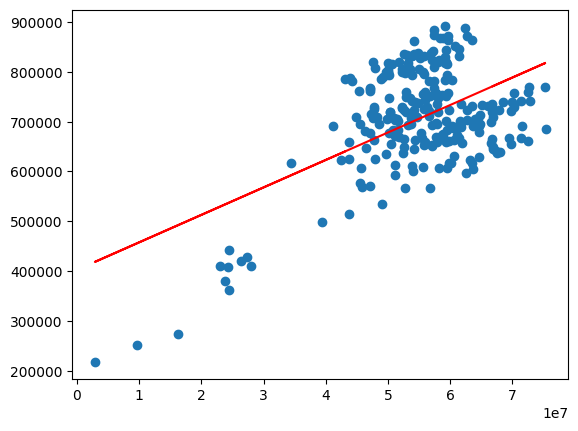

In [15]:
## TODO: Plot the scatter plot of domestic passengers versus domestic flights, and overlay the linear regression line.
plt.scatter(x,y)
plt.plot(x,mymodel,color='red')
plt.show()

In [17]:
## TODO: Print the slope, intercept, p-value, standard error, and the predicted value for 100 domestic passengers.
print("b",slope)
print("a",intercept)
print("p",p)
print("std_err",std_err)

s=myfun(100)
print(s)

b 0.005506132716515947
a 402758.7208295014
p 5.3156895585332156e-20
std_err 0.0005503852399733661
402759.27144277305


# The coefficient of correlation

The relationship between the values on the x-axis and the y-axis determines whether linear regression can be used for prediction. If there is no relationship, linear regression is not suitable for making predictions.

The correlation coefficient (r) ranges from -1 to 1. A value of 0 indicates no relationship, while values close to 1 or -1 signify a strong positive or negative relationship, respectively, with a perfect correlation at either end.

# Linear Regression


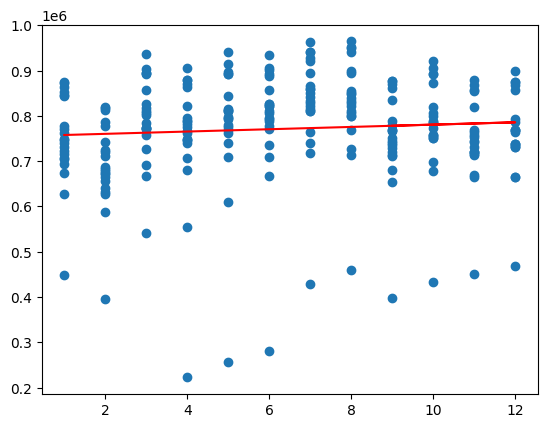

slope = 2543.594815148783
intercept = 755091.4229786595
r² = 0.07569664261539755
p = 0.2339792013546481
std_err = 2131.940150465658


In [18]:
## TODO: Calculate linear regression parameters
m=d1["Month"]
n=d1["Flt"]
slope, intercept, r2, p, std_err = stats.linregress(m, n)

## TODO:  Define the function for the linear model
def myfunc(x):
  return slope * x + intercept

## TODO:  Apply the model to the 'Month' data
mymodel = list(map(myfunc, m))


## TODO:  Plot the scatter plot and the regression line
plt.scatter(m, n)
plt.plot(m, mymodel,color='red')
plt.show()
# Results
print("slope =", slope)
print("intercept =", intercept)
print("r² =", r2)
print("p =", p)
print("std_err =", std_err)


In [19]:
## TODO: Print r2
print(r2)

0.07569664261539755


**Now Let's using ScikitLearn (Linear regression) to predict the value of y by using values of x**


In [20]:
## TODO: Prepare the data X and è for regression by reshaping the features using .reshape(-1,1)
x=d1["Dom_Pax"]
y=d1["Dom_Flt"]

x=np.array(x).reshape(-1,1)
y=np.array(y).reshape(-1,1)

In [33]:
## TODO: Split the data into training and validation sets.
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.30, random_state = 50,shuffle=True)

In [39]:
## TODO: Fit the linear regression model, make a prediction, and evaluate the model.
lin_reg = LinearRegression(fit_intercept=True,copy_X=True,n_jobs=-1)
lin_reg.fit(x_train, y_train)

y_pred=lin_reg.predict(x_test)


lin_reg.score(x_train, y_train)

0.33974886390547054

In [40]:
## TODO: Print the prediction for the given input.
print(y_pred[:5])

[[708334.35796207]
 [692037.87811433]
 [738810.15781963]
 [658685.79286339]
 [746678.83667909]]


The Mean Squared Error (MSE) measures how well a regression line fits a set of data points by calculating the average of the squared differences between the observed values and the predicted values.

The formula for MSE is:

MSE=(1/n)*sum(yi-yhati)^2

yi=observed values

yhat=predict value

MSE quantifies the error between the observed and predicted values, with smaller values indicating better model accuracy.

In [42]:
## TODO: Calculate the mean squared error (MSE) for the training set.
mse = mean_squared_error(y_true= y_test, y_pred= y_pred)
print(mse)

7683720037.001553


What do you think ?
“The Mean Squared Error is relatively high because Month is a cyclical variable that repeats every year and does not have a unique, linear relationship with the number of flights. As a result, using a simple linear regression here is not appropriate and does not capture the true seasonal trends. A better approach would be to use visualizations or time series models to analyze seasonality instead.”

# Multiple Regression

Multiple regression is a statistical technique used to model the relationship between one dependent variable and two or more independent variables. This allows us to understand how multiple predictors influence a single outcome.

The general formula for multiple regression is:

y=β0+β1x1+β2x2+⋯+βpxp+ϵ


Where:

* y is the dependent (or response) variable,
* x1​,x2​,…,xp​ are the independent (predictor) variables,
* β0​ is the intercept,
* pβ1​,β2​,…,βp​ are the regression coefficients for each independent variable,
* ϵ is the error term.

the goal is to estimate the coefficients (β) that minimize the error between the predicted and actual values of the dependent variable.

In [43]:
## TODO: Reshape the features mx and target variables my .
X = d1[['Dom_Pax', 'Int_Pax']]
y = d1['Flt']

In [44]:
## TODO: Split the features and target variables into training and validation sets.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [48]:
## TODO: Fit the multiple regression model and calculate the R^2 score on the training data using .score
# Initialize and fit the model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = model.score(X_test, y_test)
print("MSE: ", mse)
print("r2: ", r2)

MSE:  7633347502.705397
r2:  -0.016687172241940607


In [49]:
## TODO: Print the target values
print(y_test)

137    778423.0
6      894576.0
97     687145.0
60     864080.0
112    795525.0
180    723111.0
196    815270.0
183    767348.0
9      872580.0
104    768040.0
199    848650.0
215    467620.0
201    805988.0
239    663948.0
67     898759.0
223    712664.0
193    673087.0
15     878354.0
162    809770.0
24     872141.0
246    764677.0
19     951311.0
114    833647.0
68     788085.0
175    810895.0
45     891323.0
55     949167.0
10     819659.0
30     961902.0
120    730667.0
200    769351.0
33     892282.0
140    727898.0
159    746635.0
25     820306.0
111    775919.0
18     940939.0
195    781801.0
173    795324.0
158    771996.0
118    731077.0
96     749578.0
108    745717.0
184    797342.0
190    742649.0
16     895946.0
194    806233.0
69     819535.0
172    779642.0
38     894057.0
Name: Flt, dtype: float64


In [50]:
## TODO: Make a prediction using the multiple regression model.
print(y_pred)

[780917.37144822 790268.38989543 675954.29855812 723789.39772481
 768329.32367281 757544.99227105 884045.40526352 832877.33912164
 752836.60792922 735175.26429311 881700.72396377 562806.16443833
 888219.90874472 808260.41850281 786025.71394399 833223.32064255
 765680.06902618 773575.76103834 825239.71840737 717171.10070135
 887295.06494042 793957.85983538 783504.0272666  712023.73620993
 833925.73158504 782242.21161499 823463.96063511 726786.0865044
 828820.14627933 699367.63501521 833644.30730168 775215.3381423
 743456.15785158 790796.49472203 717847.79734902 750679.76530838
 812199.46500089 849325.8425989  837098.93252603 807676.57862101
 745817.37315495 687615.2505163  694893.39189319 858457.80326977
 847494.76175909 770050.59894508 873501.50061953 759546.88790853
 829812.78359505 799191.68662908]


# Hypothesis testing

Hypothesis testing is a systematic procedure used to evaluate whether the results of a research study support a particular theory or assumption about a population. It helps determine if there is enough evidence to reject or fail to reject a hypothesis based on sample data.

**we have two types**

1. The null hypothesis H0, represents the idea that there is no effect, relationship, or difference in the population. It serves as the baseline assumption that any observed effect in the data is due to chance.

Example: "There is no significant difference in test scores between two groups."

2. The alternative hypothesis Ha suggests that there is an effect, relationship, or difference in the population. It is what researchers typically aim to support with their data.

Example: "There is a significant difference in test scores between two groups."

In hypothesis testing, we aim to gather enough evidence from the sample to either reject the null hypothesis (H0H0​) in favor of the alternative hypothesis (HaHa​), or fail to reject the null hypothesis, indicating that there isn't sufficient evidence for the alternative hypothesis.


# Null hypothesis

The null hypothesis (H0H0​) is a statement that there is no significant difference or effect in the population. It assumes that any observed differences in the sample are due to random chance.

In hypothesis testing, the decision to reject or fail to reject the null hypothesis is based on the p-value.

If :
* p ≤ 0.05: Reject H0H0​ (evidence supports HaHa​).
* p > 0.05: Fail to reject H0H0​ (no evidence to support HaHa​).

# Alternative hypothesis Ha

The alternative hypothesis (HaHa​) is a statement in statistical hypothesis testing that suggests there is a significant difference, effect, or relationship in the population, contrary to the null hypothesis (H0H0​).

In other words, HaHa​ proposes that the observed data is not due to random chance, and there is some true effect or difference in the population that can be detected.

For example:

- Null Hypothesis (H0​): There is no significant difference in test scores between two groups.
- Alternative Hypothesis (Ha​): There is a significant difference in test scores between the two groups.

The goal of hypothesis testing is to gather enough evidence to reject the null hypothesis in favor of the alternative hypothesis, suggesting that the observed effect or difference is statistically significant.

In [ ]:
## (Optional) TODO: Perform hypothesis testing for two variables of your choice

# One sample test

is used to compare the diffrence between sample and population mean

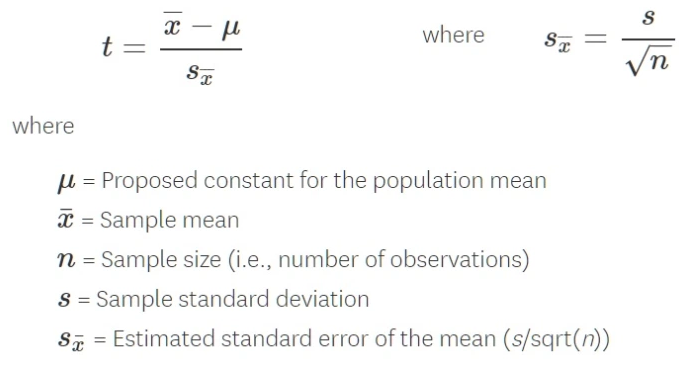

In [54]:
## TODO: Calculate the population mean of the "Year" column.
popmean = d1['Year'].mean()

In [51]:
# let's take sample from data

sample=np.random.choice(d1["Year"],50)

In [52]:
sample

array([2015, 2009, 2014, 2017, 2013, 2003, 2015, 2008, 2005, 2004, 2017,
       2021, 2022, 2020, 2022, 2003, 2008, 2011, 2007, 2021, 2012, 2008,
       2009, 2006, 2005, 2020, 2014, 2017, 2013, 2009, 2023, 2010, 2016,
       2019, 2015, 2010, 2007, 2010, 2009, 2011, 2023, 2012, 2021, 2013,
       2017, 2018, 2014, 2022, 2019, 2018])

In [55]:
## Perform a one-sample t-test to compare the sample mean with the population mean.
ttest,p_value=ttest_1samp(sample,popmean)


In [56]:
ttest

np.float64(0.7591964593715296)

In [57]:
sample.mean()

np.float64(2013.5)

In [ ]:
## TODO: Perform hypothesis testing based on the p-value.
p_value
#We fail to reject H0

np.float64(0.4513719501723845)

# Two sample test

it is a statistical test used to compare the means of two independent groups to determine if there is a statistically significant difference between them. It is commonly employed when researchers want to assess whether the mean values of a particular variable differ between two distinct groups.

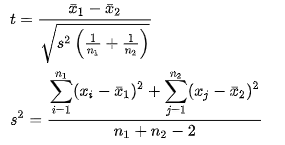

In [61]:
## TODO: Randomly select a sample of 50 from the "Flt" column.
sample1=np.random.choice(d1["Flt"],50)

In [62]:
## TODO: Randomly select a sample of 50 from the "Dom_Pax" column.
sample2=np.random.choice(d1["Dom_Pax"],50)

In [65]:
## TODO: Perform an independent t-test between `sample_a` and `sample_b` to compare their means.
from scipy.stats import ttest_ind
ttest,p_value=ttest_ind(sample1, sample2)

In [66]:
if p_value <=0.05:
    print("rejected null hypothesis",p_value)
else:
    print("accepted null hypothesis",p_value)

rejected null hypothesis 1.196467953158782e-63


# Type| & Type ||

Reject the null hypothesis when it’s actually true (Type I error)

Reject the null hypothesis when it’s actually false (Correct)

Fail to reject the null hypothesis when it’s actually true (Correct)

Fail to reject the null hypothesis when it’s actually false (Type II error)

![](https://miro.medium.com/v2/resize:fit:828/format:webp/0*JM4fxEI__jX5f4Oy)